In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Conv2D, GlobalAveragePooling1D

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Thesis Slide/Datasets /Bangla Online Comments Dataset.csv', sep = ',', encoding = 'utf-8-sig')

In [4]:
data

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully


In [5]:
vocab_size = 19469
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 9600


In [6]:
import string
#remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series

#data['comment_text'] = data['comment_text'].str.replace('“”‘’','')
#data['comment_text'] = data['comment_text'].str.replace('’‘“”,'')
data['comment'] = data['comment'].str.replace('।','')

data['comment'] = data['comment'].apply(remove_punctuations)

In [7]:
data['comment'].head(10000)

0       ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1        ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
2                                 অরে বাবা এই টা কোন পাগল
3                                   ক্যাপ্টেন অফ বাংলাদেশ
4                                                পটকা মাছ
                              ...                        
9995                                      ঝাপা পাগলা ঝাপা
9996    সারা বছর গাঞ্জার নৌকা যায় পাহাড় তলীআর রমজান মা...
9997     বলার কিছুই নেই নিজের কৃতকর্মের ফল নিজেই ভোগ করবে
9998    দোষ তো তোর মা বাবার না সব দোষ কোম্পানিরবাইনচুত...
9999    অনন্য শেখর খানকির পোলা তাহলে ও নিজেকে মুসলমান ...
Name: comment, Length: 10000, dtype: object

In [8]:
data['comment'] = data['comment'].str.replace('৷','')
data['comment'] = data['comment'].str.replace('\n','')

In [9]:
#Remove emojis
import re


def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u09E6-\u09EF"#banglanumerical code
                               u"\u0030-\u0039"#englishnumercal code
                               u"\u0041-\u005A"#uppercaseenglish alphabet
                               u"\u0061-\u007A"#lowercaseenglish alphabet
                               u"\u2019"
                               u"\u2018"
                               u"\u201C"
                               u"\u201D"
                               u"\u201E"
                               u"\u201F"

                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data['new']=data['comment'].apply(remove_emoji)

In [10]:
data

,comment,Category,Gender,comment react number,label,new
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
2,অরে বাবা এই টা কোন পাগল,Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ
...,...,...,...,...,...,...
43996,হিরো আলম এগিয়ে যাও,Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি


In [11]:
sw = pd.read_csv("/content/drive/MyDrive/Thesis Slide/Datasets /stopwords-bn.csv")
sw.columns = ['Words']
sw.head()
sw = sw['Words']
sw.shape

(397,)

In [12]:
stop_words = ['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য','দেখাচ্ছে','এইসব','একই','চায়','দিয়ে','অথচ','নিয়ে','বাকি','কিন্তু','এদের','অনেক','পারেনা','দেখান' ,'এক' ,'হয়ে','করছে ','ছাড়া','তুই','তোর','তুমিও','দেয়া ','থেকে','ওয়া','নিজার','ছিঃ','কিছু','থাকে','তুর','তো','তরফ','দিয়েছে','রেখে', 'গেছে ','তে',
      'আপনারা','অর','একটু','আপনাদেরকে','একজন''দেয়া','আপনারটা','আপনাকে','মত','আপনিও','আপনিই','আনা','হয়েছে','আজকে','তোরে','আজও','আছোস','আছি','আচ্ছা','আজকে','আছিলি','আছিস','আছেন','আগেও','আমরাও','আমিও','আরে','আরেক','আরেকজনকে','করছি','আসেন','ইউ','ইকটু','ইয়ে','ইয়েস']
for i in range(sw.shape[0]):
    stop_words.append(sw[i])
print(type(stop_words))
print(len(stop_words))
print(stop_words)

data['new']=data['new'].apply(lambda x: [item for item in x if item not in stop_words])

<class 'list'>
580
['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা', 'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়', 'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন', 'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার', 'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে', 'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর', 'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা', 'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের', 'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি', 'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য', 'দেখাচ্ছে', 'এইসব', 'একই', 'চায়', 'দি

In [13]:
label = data['label'].values.tolist()
comment = data['comment'].values.tolist()
category = data['Category'].values.tolist()
gender = data['Gender'].values.tolist()
print(comment[30])

শ্রদ্ধেয় ড কামাল হোসেন সাহেব আর যাই হোক একজন শিবির কর্মী আর আরেকজন উশৃংখল ও টাকা পাচারকারীর পক্ষ অবলম্বন করে ভাবমূর্তি খোয়ালেন


In [14]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [15]:
label2D = pd.get_dummies(data[['label']])
data = encode_and_bind(data, 'label')
label_not_bully = data['label_not bully'].values.tolist()
label_religious = data['label_religious'].values.tolist()
label_sexual = data['label_sexual'].values.tolist()
label_threat = data['label_threat'].values.tolist()
label_troll = data['label_troll'].values.tolist()

In [16]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(comment)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(comment)
padded = pad_sequences(sequences, padding='post')
print(padded.shape)

{'<OOV>': 1, 'না': 2, 'করে': 3, 'কি': 4, 'এই': 5, 'আর': 6, 'নাস্তিক': 7, 'বিশ্বাস': 8, 'তো': 9, 'আল্লাহ': 10, 'যে': 11, 'তুই': 12, 'কথা': 13, 'কে': 14, 'আমি': 15, 'ও': 16, 'আপনি': 17, 'আপনার': 18, 'তার': 19, 'থেকে': 20, 'জন্য': 21, 'একটা': 22, 'তোর': 23, 'হিরো': 24, 'কাছে': 25, 'আমার': 26, 'সে': 27, 'সাফা': 28, 'তুমি': 29, 'এর': 30, 'ভাই': 31, 'কোন': 32, 'নাই': 33, 'আলম': 34, 'কিছু': 35, 'আছে': 36, 'হয়': 37, 'হবে': 38, 'করতে': 39, 'ভালো': 40, 'ক্ষমা': 41, 'বলে': 42, 'অনেক': 43, 'যদি': 44, 'মানুষ': 45, 'তোমার': 46, 'মনে': 47, 'দিয়ে': 48, 'করা': 49, 'এখন': 50, 'করেন': 51, 'তাহলে': 52, 'হয়ে': 53, 'কবির': 54, 'আল্লাহর': 55, 'সব': 56, 'আমরা': 57, 'মাগি': 58, 'নিয়ে': 59, 'ভুল': 60, 'এটা': 61, 'আপনাকে': 62, 'আমাদের': 63, 'আবার': 64, 'সাথে': 65, 'কিন্তু': 66, 'মত': 67, 'এবং': 68, 'তাই': 69, 'তা': 70, 'পরকাল': 71, 'সুন্দর': 72, 'তাকে': 73, 'সবাই': 74, 'করি': 75, 'কমেন্ট': 76, 'করার': 77, 'কেউ': 78, 'দেখে': 79, 'দান': 80, 'টা': 81, 'খান': 82, 'কেন': 83, 'যারা': 84, 'এ': 85, 'বাবা': 86, 'মতো': 87

In [17]:
# label2D = label2D.drop(['label_not bully'], axis=1)
label2D = label2D.drop(['label_religious'], axis=1)
label2D = label2D.drop(['label_threat'], axis=1)
label2D = label2D.drop(['label_troll'], axis=1)
label2D = label2D.drop(['label_sexual'], axis=1)

# testing_labels = label2D[training_size:]
# training_labels = label2D[0:training_size]
print(len(label2D))

44001


In [18]:
from sklearn.model_selection import train_test_split
X = comment
Y = label2D

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, test_size=0.15)

testing_labels = Y_test
training_labels = Y_train

In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(training_padded.shape)
print(testing_padded.shape)

(37400, 120)
(6601, 120)


In [20]:
Y_train

,label_not bully
9696,1
35731,0
24500,0
9995,0
40550,1
...,...
35483,0
39296,1
2693,0
8076,0


In [21]:
X[12140]

'কলিজার ভাইটি'

In [22]:
import numpy as np
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_labels = np.array(training_labels)


In [23]:
type(label2D)
#testing_labels = label2D[training_size:]
#training_labels = label2D[0:training_size]
print(testing_labels.shape)
print(training_labels.shape)
# training_labels[0].shape

print(label2D.shape)

(6601, 1)
(37400, 1)
(44001, 1)


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.LSTM(100, dropout=0.2,return_sequences=True,  recurrent_dropout=0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

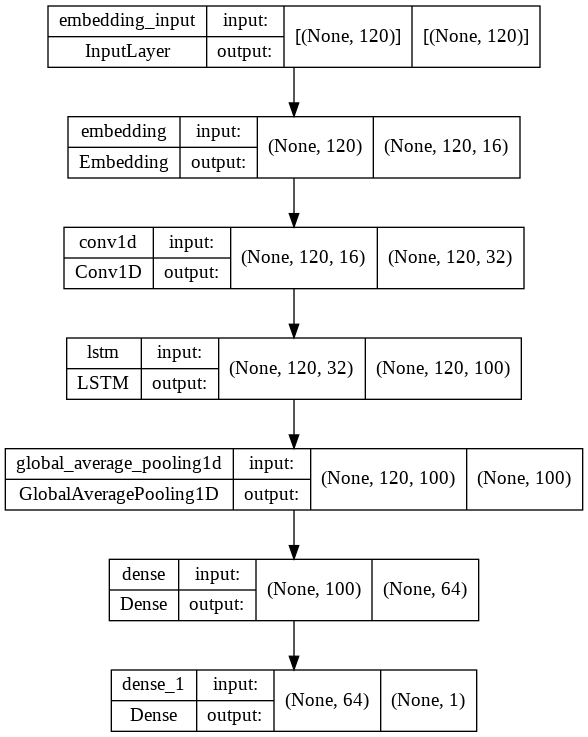

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model1.png')

In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           311504    
                                                                 
 conv1d (Conv1D)             (None, 120, 32)           1568      
                                                                 
 lstm (LSTM)                 (None, 120, 100)          53200     
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [27]:
print(training_padded.shape)
print(training_labels.shape)
print(testing_padded.shape)
print(testing_labels.shape)
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),
                   callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15), #stop training if accuracy doesn't improve in next 3 epoch
    ])

(37400, 120)
(37400, 1)
(6601, 120)
(6601, 1)
Epoch 1/15
1169/1169 [==============================] - 256s 216ms/step - loss: 0.4448 - accuracy: 0.8026 - val_loss: 0.3598 - val_accuracy: 0.8341
Epoch 2/15
1169/1169 [==============================] - 244s 209ms/step - loss: 0.3142 - accuracy: 0.8617 - val_loss: 0.3028 - val_accuracy: 0.8624
Epoch 3/15
1169/1169 [==============================] - 241s 207ms/step - loss: 0.2719 - accuracy: 0.8824 - val_loss: 0.2828 - val_accuracy: 0.8759
Epoch 4/15
1169/1169 [==============================] - 241s 206ms/step - loss: 0.2557 - accuracy: 0.8897 - val_loss: 0.2929 - val_accuracy: 0.8718
Epoch 5/15
1169/1169 [==============================] - 241s 206ms/step - loss: 0.2468 - accuracy: 0.8958 - val_loss: 0.2698 - val_accuracy: 0.8809
Epoch 6/15
1169/1169 [==============================] - 243s 208ms/step - loss: 0.2391 - accuracy: 0.8994 - val_loss: 0.2772 - val_accuracy: 0.8738
Epoch 7/15
1169/1169 [==============================] - 242s 207ms

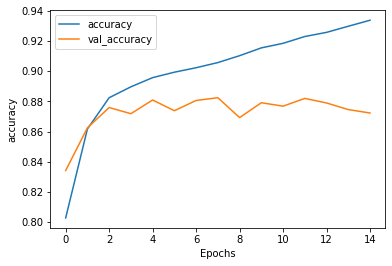

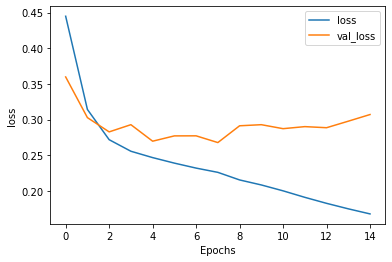

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [29]:
sentence = ['অই বেশ্যার কথাগুলো শুনলেই বুঝা যায় কি চমৎকার ডায়লগ সাজিয়েছে। পশুর বাচ্চারা।কিভাবে সংলাপ গুলো বানিয়েছে। মহিলার বাড়িতে একবার গেছি আর কোনো দিন যাবনা বিশ্বাস কর।... অভিশপ্ত নাস্তিকরা মনে করে ওদের অপকর্ম মানুষ বুঝবে না। মানুষ কি ওদের মত বলদ চোদা। অই বেশ্যা কন্ঠে কতরকম ভাবে ডায়ালগ দিয়েছে মনের মাধুরী মিশিয়ে আর মাওলানা সাঈদীর কন্ঠ ডাবিং করে জুড়ে দিয়েছে। কয়দিন করবে এসব? শেষ রক্ষা হবে তো?']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(padded)
print(pred)
        
print('Not Bully : '+str(pred[0]))
print('Bully : '+str(1-pred[0]))

[[0.00046265]]
Not Bully : [0.00046265]
Bully : [0.99953735]


In [30]:
sentence = ['বাংলাদেশের রানের থেকে আমার গার্লফ্রেন্ড এর সংখ্যা বেশি😆একবার খেলায় নিয়ে দেখ তদের চেয়ে ভালো করে দেখাবো,কথায় নয় কাজে বিশ্বাসি🥰']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(padded)
print(pred)
        
print('Not Bully : '+str(pred[0]))
print('Bully : '+str(1-pred[0]))

[[0.09631184]]
Not Bully : [0.09631184]
Bully : [0.9036882]


In [31]:
sentence = ['পা দুটোতে মনে হচ্ছে পোলিও হয়েছে 🤣🙏']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(padded)
print(pred)
        
print('Not Bully : '+str(pred[0]))
print('Bully : '+str(1-pred[0]))

[[0.03983361]]
Not Bully : [0.03983361]
Bully : [0.9601664]
